<a href="https://colab.research.google.com/github/HuijiaoLuo/Simulation/blob/Quantum/Simple_2DIsingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Author: Huijiao Luo
Email: HJ.Luo@outlook.com
Date: 16/07/2024
"""

# Import the necessary libraries for the simulation
import numpy as np
import matplotlib.pyplot as plt

The notebook refers to the blog [Ising Model](https://rajeshrinet.github.io/blog/2014/ising-model/).

In [2]:
def initialize_config(L):
    """Initialize a 2D configuration with random spins (+1 or -1)"""
    return 2 * np.random.randint(2, size = (L, L)) - 1

def calculate_energy(config, J):
    """Calculate the energy of the entire system"""
    energy = 0
    L = len(config) #
    for i in range(L):
        for j in range(L):
            neighbors = config[(i + 1) % L, j] + config[(L + i - 1) % L, j] + config[i, (j + 1) % L] + config[i, (L + j - 1) % L]
            energy += -J * config[i, j] * neighbors
    return energy / 4

def calculate_Magnetization(config):
    """Calculate the magnetization of the given configuration"""
    mag = np.sum(config)
    return mag

def metropolis_steps(config, beta):
    """Perform the metropolis steps to update the configuration"""
    L = len(config)
    for _ in range(L):
        for _ in range(L):
            i = np.random.randint(0, L)
            j = np.random.randint(0, L)
            s = config[i, j]
            neighbors = config[(i + 1) % L, j] + config[(L + i - 1) % L, j] + config[i, (j + 1) % L] + config[i, (L + j - 1) % L]
            # Energy loss between original configuration and the configuration with flipped spin
            delta_E = 2 * s * neighbors
            if delta_E < 0 or np.random.rand() < np.exp(-delta_E * beta):
                config[i, j] = -s
    return config

In [3]:
def ising_2d(L, J, T, eqSteps, mcSteps):
    """Simulate the 2D Ising Model by applying Monte Carlo approach"""
    beta = 1.0 / T
    E1 = M1 = 0
    Energy_evolution = []
    Mag_evolution = []

    # Initialization
    config = initialize_config(L)
    Energy_evolution.append(calculate_energy(config, J))  # Record how system energy changes over time
    Mag_evolution.append(calculate_Magnetization(config)) # Record how system magnetization changes over time


    # Apply Monte Carlo approach to achieve system equilibration
    for _ in range(eqSteps):
        config = metropolis_steps(config, beta)
        Energy_evolution.append(calculate_energy(config, J))
        Mag_evolution.append(calculate_Magnetization(config))


    # Obtain the average values of the system energy and magnetization By Monte Carlo approach
    Mag = 0
    Energy = 0
    for _ in range(mcSteps):
        config = metropolis_steps(config, beta)
        Energy = calculate_energy(config, J)     # calculate the energy
        Mag = calculate_Magnetization(config)    # calculate the magnetization

        E1 = E1 + Energy
        M1 = M1 + Mag

    return Energy_evolution, Mag_evolution, E1, M1

In [4]:
# Parameters setting
J = 1              # Interation between adjacent sites
L = 16             # The number of sites in lattice
nt = 100           # Number of temperature points
eqSteps = 512      # Number of MC sweeps for equilibration
mcSteps = 1024     # Number of MC sweeps for calculation

T = np.linspace(1.53, 3.28, nt)   # Temperature

# Record the intensive values of system energy and magnetization for different temperatures, respectively
E, M = np.zeros(nt), np.zeros(nt)

n1 = 1.0 / (mcSteps * L * L)   # Divide by number of samples, and by system size to get intensive values

E_evolution = []
M_evolution = []

# Run simulation
for tt in range(nt):
    Energy_evol, Mag_evol, E1, M1 = ising_2d(L, J, T[tt], eqSteps, mcSteps)
    E_evolution.append(Energy_evol)
    M_evolution.append(Mag_evol)
    # print(E1, M1)
    E[tt] = E1 * n1
    M[tt] = M1 * n1

In [5]:
eqLegend = []
T_index = [tt for tt in range(nt)]
select_time = np.random.choice(T_index, 3)
select_time

array([50, 29, 85])

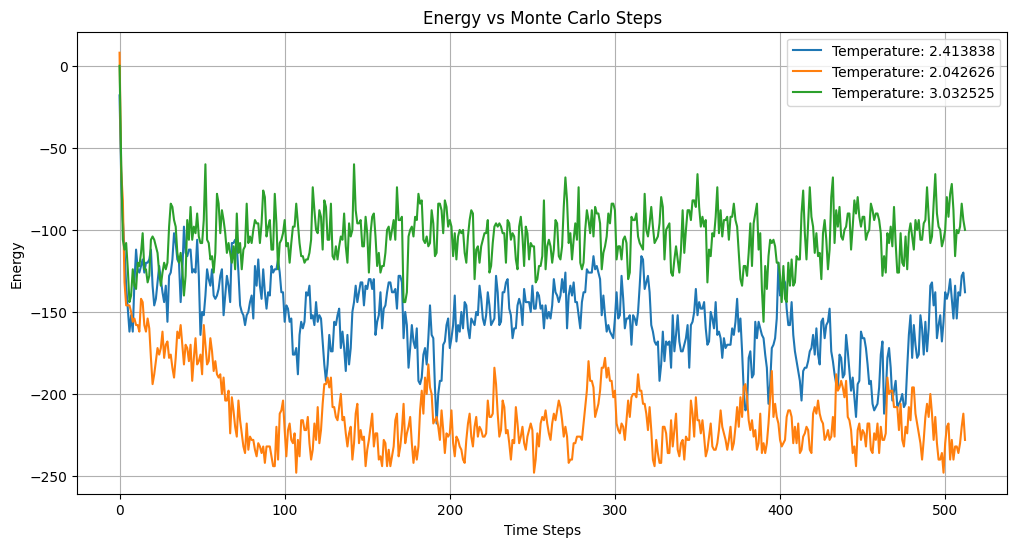

In [6]:
# Plot energy vs steps
plt.figure(figsize=(12, 6))
for tt in select_time:
    eqLegend.append("Temperature: %f"%T[tt])
    plt.plot(E_evolution[tt])

plt.title('Energy vs Monte Carlo Steps')
plt.xlabel('Time Steps')
plt.ylabel('Energy')
plt.legend(eqLegend)
plt.grid()
plt.show()

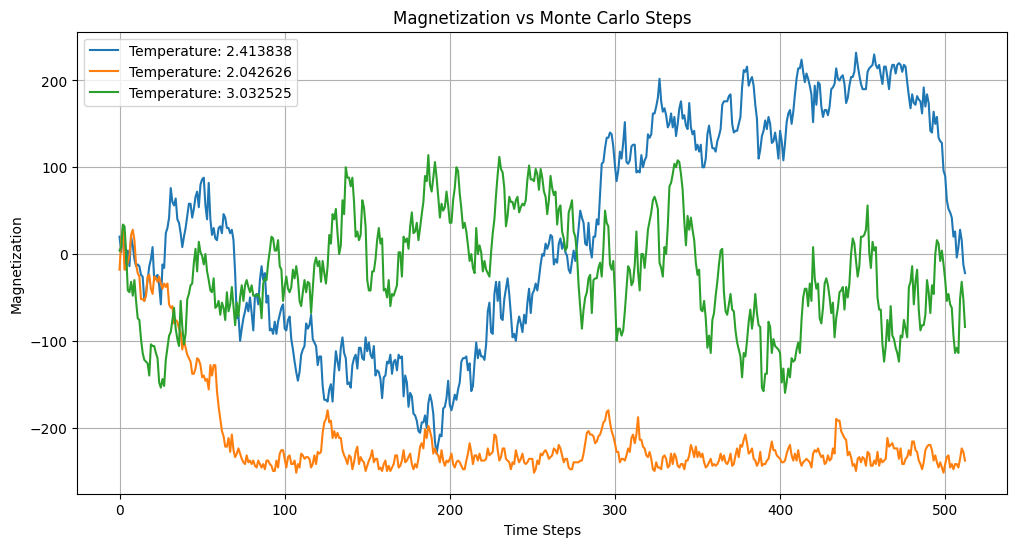

In [7]:
plt.figure(figsize=(12, 6))
for tt in select_time:
    eqLegend.append("Temperature: %f"%T[tt])
    plt.plot(M_evolution[tt])

plt.title('Magnetization vs Monte Carlo Steps')
plt.xlabel('Time Steps')
plt.ylabel('Magnetization')
plt.legend(eqLegend)
plt.grid()
plt.show()

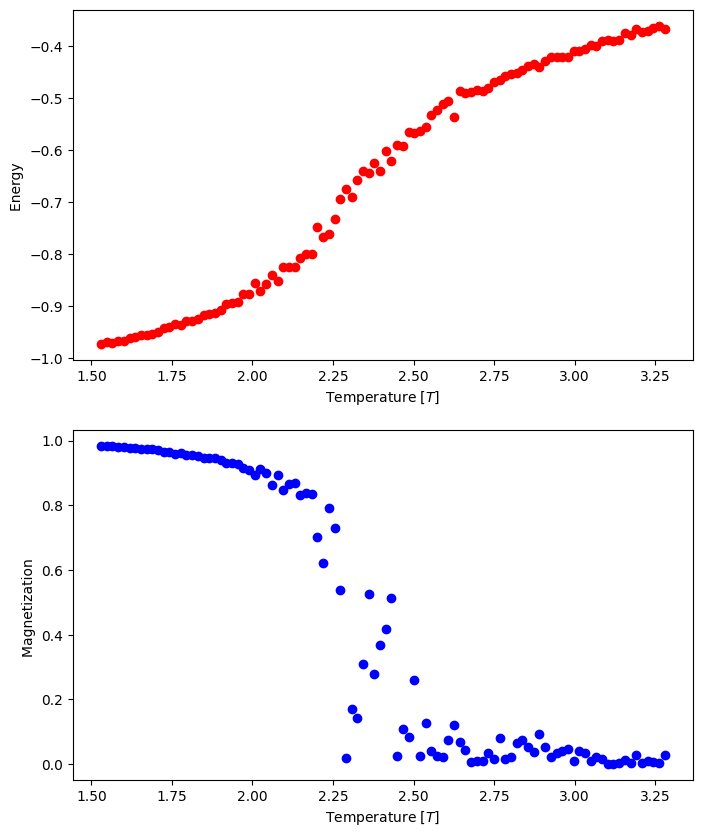

In [8]:
f = plt.figure(figsize=(8, 10))   # plot the calculated values

sp =  f.add_subplot(2, 1, 1 )
plt.scatter(T, E, color = 'r')
plt.xlabel("Temperature" + " [$T$]")
plt.ylabel("Energy ")
plt.axis('tight')

sp =  f.add_subplot(2, 1, 2 )
plt.scatter(T, abs(M), color = 'b')
plt.xlabel("Temperature" + " [$T$]")
plt.ylabel("Magnetization ")
plt.axis('tight')
plt.show()